In [1]:
import pandas as pd
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram

In [2]:
df_artists = pd.read_csv('artists.csv', index_col='artist', converters={'genres': literal_eval, 'albums': literal_eval,
                                                                        'related_artists':literal_eval, 'related_genres':literal_eval})

## Data wrangling

Impute empty genres with related genres

In [3]:
df_artists.loc[df_artists['genres'].apply(lambda x: len(x) == 0), 'genres'] = df_artists['related_genres']

In [4]:
mlb = MultiLabelBinarizer()
mlb.fit(df_artists['genres'])

MultiLabelBinarizer(classes=None, sparse_output=False)

One-hot encode genres

In [5]:
df_genres = pd.DataFrame(data=mlb.transform(df_artists['genres']), 
                         columns=['genre: {}'.format(genre) for genre in mlb.classes_],
                         index=df_artists.index)

In [6]:
df_artists = df_artists.join(df_genres)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: afro house,genre: alternative r&b,...,genre: trap argentino,genre: trap chileno,genre: trap espanol,genre: trap latino,genre: tropical,genre: tropical house,genre: uk alternative pop,genre: uk pop,genre: underground hip hop,genre: vapor twitch
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7681137,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12550126,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0,0,0,0,0,1,0,0,0,0
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1670231,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
BROCKHAMPTON,1Bl6wpkWCQ4KVgnASpvzzA,1179004,"[boy band, hip hop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
Duki,1bAftSH8umNcGZ0uyV7LMg,2706108,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, Khea, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,1,0,0,0,0,0,0,0,0,0


One-hot encode related artists

In [7]:
mlb.fit(df_artists['related_artists'])
df_related_artists = pd.DataFrame(data=mlb.transform(df_artists['related_artists']), 
                         columns=['related_artist: {}'.format(related_artist) for related_artist in mlb.classes_],
                         index=df_artists.index)

In [8]:
df_artists = df_artists.join(df_related_artists)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: afro house,genre: alternative r&b,...,related_artist: mimi bay,related_artist: sfam,related_artist: slowthai,related_artist: sumthin sumthin,related_artist: t.A.T.u.,related_artist: thook,related_artist: tobi lou,related_artist: zack villere,related_artist: Árbol,related_artist: Ñejo
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7681137,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12550126,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1670231,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
BROCKHAMPTON,1Bl6wpkWCQ4KVgnASpvzzA,1179004,"[boy band, hip hop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0,0,1,0,0,0,0,0,0,0
Duki,1bAftSH8umNcGZ0uyV7LMg,2706108,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, Khea, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,0,0,0,0,0,0,0,0,0,0


Weight related genres

In [9]:
df_related_genres = df_artists['related_genres'].apply(lambda x: pd.Series(x).value_counts())
df_related_genres.columns = ['related_genre: '+c for c in df_related_genres.columns]
df_related_genres.fillna(0, inplace=True)

In [10]:
df_artists = df_artists.join(df_related_genres)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: afro house,genre: alternative r&b,...,related_genre: south african hip hop,related_genre: south african punk,related_genre: electro swing,related_genre: minimal tech house,related_genre: nu disco,related_genre: louisville indie,related_genre: experimental bass,related_genre: south african electronic,related_genre: nz electronic,related_genre: latincore
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7681137,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12550126,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1670231,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BROCKHAMPTON,1Bl6wpkWCQ4KVgnASpvzzA,1179004,"[boy band, hip hop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Duki,1bAftSH8umNcGZ0uyV7LMg,2706108,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, Khea, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One-hot encode argentinian artists

In [11]:
is_argentinian = pd.read_csv('is_argentinian.csv', index_col='artist')

In [12]:
df_artists = df_artists.join(is_argentinian)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: afro house,genre: alternative r&b,...,related_genre: south african punk,related_genre: electro swing,related_genre: minimal tech house,related_genre: nu disco,related_genre: louisville indie,related_genre: experimental bass,related_genre: south african electronic,related_genre: nz electronic,related_genre: latincore,is_argentinian
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7681137,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12550126,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1670231,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
BROCKHAMPTON,1Bl6wpkWCQ4KVgnASpvzzA,1179004,"[boy band, hip hop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Duki,1bAftSH8umNcGZ0uyV7LMg,2706108,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, Khea, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Year of the first release

In [13]:
first_release = lambda x: pd.DatetimeIndex(pd.Series(df_artists.loc[x]['albums']).index).min().year

In [14]:
df_artists['first_release'] = df_artists.index.map(first_release)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: afro house,genre: alternative r&b,...,related_genre: electro swing,related_genre: minimal tech house,related_genre: nu disco,related_genre: louisville indie,related_genre: experimental bass,related_genre: south african electronic,related_genre: nz electronic,related_genre: latincore,is_argentinian,first_release
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7681137,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2012
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12550126,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1670231,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1986
BROCKHAMPTON,1Bl6wpkWCQ4KVgnASpvzzA,1179004,"[boy band, hip hop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2015
Duki,1bAftSH8umNcGZ0uyV7LMg,2706108,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, Khea, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2017


---

## Exploratory Data Analysis

Quantity of artists per day

In [15]:
df_artists.groupby('day')['artist_id'].count()

day
1    32
2    31
3    28
Name: artist_id, dtype: int64

Proportion of argentinian artists per day

In [16]:
df_artists.groupby('day')['is_argentinian'].mean().round(2)

day
1    0.41
2    0.35
3    0.29
Name: is_argentinian, dtype: float64

Followers distribution

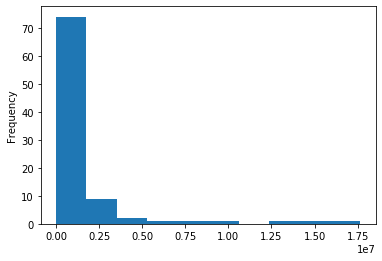

In [17]:
df_artists['followers'].plot(kind='hist');

First release distribution

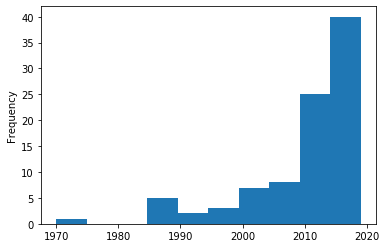

In [18]:
df_artists['first_release'].plot(kind='hist');

Genres distribution per day - not exclusive categories

In [19]:
# Day 1
df_artists.loc[df_artists['day'] == 1, [c for c in df_artists.columns if 'genre:' in c and 'related_' not in c]].mean()\
          .sort_values(ascending=False).head()

genre: argentine indie    0.15625
genre: edm                0.12500
genre: pop                0.09375
genre: modern rock        0.09375
genre: latin rock         0.09375
dtype: float64

In [20]:
# Day 2
df_artists.loc[df_artists['day'] == 2, [c for c in df_artists.columns if 'genre:' in c and 'related_' not in c]].mean()\
          .sort_values(ascending=False).head()

genre: pop                0.258065
genre: argentine indie    0.193548
genre: argentine rock     0.161290
genre: rock nacional      0.161290
genre: latin rock         0.161290
dtype: float64

In [21]:
# Day 3
df_artists.loc[df_artists['day'] == 3, [c for c in df_artists.columns if 'genre:' in c and 'related_' not in c]].mean()\
          .sort_values(ascending=False).head()

genre: pop                0.178571
genre: electro house      0.178571
genre: edm                0.142857
genre: cumbia pop         0.142857
genre: electronic trap    0.107143
dtype: float64

---

## Artist Clustering

In [22]:
cluster_data = df_artists.drop(['artist_id', 'followers', 'popularity', 'albums',
                                'genres', 'related_artists', 'related_genres', 'day'], axis=1)

In [23]:
scaler = StandardScaler()
cluster_data = scaler.fit_transform(cluster_data)

In [24]:
dist =  1 - cosine_similarity(cluster_data)

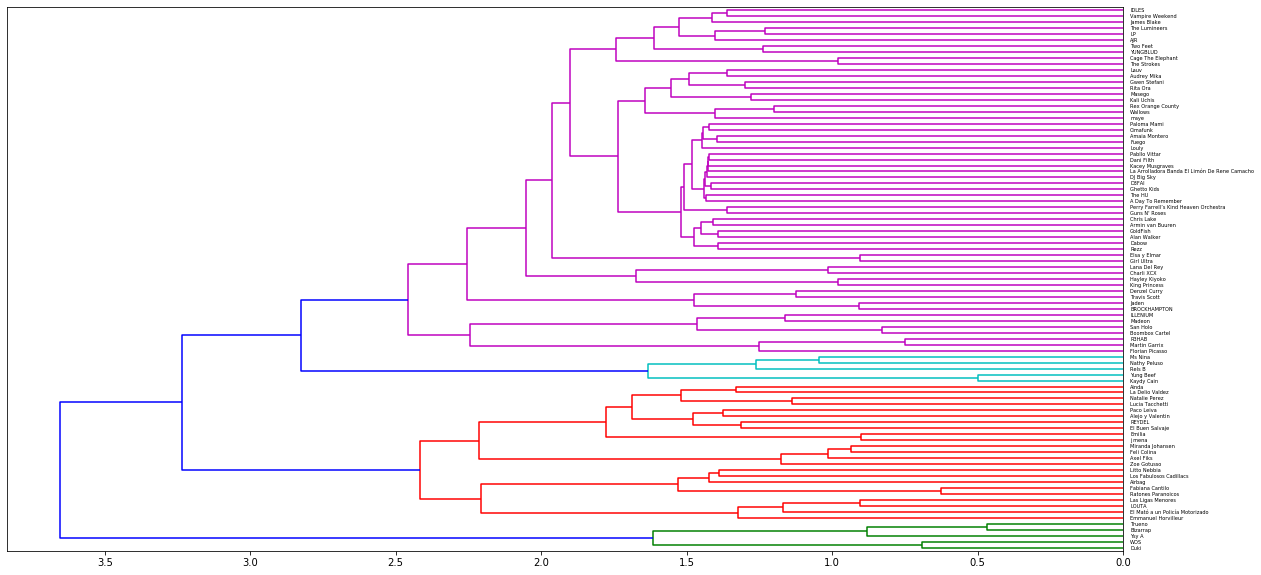

In [26]:
linkage_matrix = ward(dist)
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, orientation = 'left', labels = df_artists.index)
plt.savefig('dendrogram.svg');

---